In [1]:
import numpy as np
from IPython.core.display import HTML

In [2]:
x = np.array([1,2,3]) # 1D vector
print(x.shape)
x

(3,)


array([1, 2, 3])

In [3]:
y = x.reshape(-1,1) # vertical 2D vector
y

array([[1],
       [2],
       [3]])

In [4]:
z = x.reshape(1,-1) # horiz 2D vector
print(z)
z.shape

[[1 2 3]]


(1, 3)

In [5]:
A = np.array([[1,2,8,9],[3,4,22,1]])
A

array([[ 1,  2,  8,  9],
       [ 3,  4, 22,  1]])

In [179]:
B = np.ones((100,100))
for i in range(100):
    for j in range(100):
        B[i,j] = i+j
B

array([[  0.,   1.,   2., ...,  97.,  98.,  99.],
       [  1.,   2.,   3., ...,  98.,  99., 100.],
       [  2.,   3.,   4., ...,  99., 100., 101.],
       ...,
       [ 97.,  98.,  99., ..., 194., 195., 196.],
       [ 98.,  99., 100., ..., 195., 196., 197.],
       [ 99., 100., 101., ..., 196., 197., 198.]])

In [6]:
YELLOW = "#fefecd" # "#fbfbd0" # "#FBFEB0"
BLUE = "#D9E6F5"
GREEN = "#cfe2d4"
class Prefs: pass
prefs = Prefs()
prefs.max_str_len = 20         # how many chars before we abbreviate with ...?
prefs.max_horiz_array_len = 40 # how many chars before it's too wide and we go vertical?
prefs.max_list_elems = 10      # how many elements max to display in list (unused so far)

In [180]:
def ndarrayviz(data):
    
    return None

def gr_1darray_html(data, bgcolor=YELLOW):
    return None

def gr_2darray_html(data, bgcolor=YELLOW):
    if len(data)==0:
        return " "
    if not isinstance(data,np.ndarray):
        return " "
    if data.ndim == 1:
        return gr_1darray_html(data, bgcolor)
    if data.ndim > 2:
        return " "

    nrows,ncols = data.shape
    header = '<table BORDER="0" CELLPADDING="0" CELLBORDER="1" CELLSPACING="0">\n'
    tail = "</table>\n"

    # grab slice of max elements from matrix
    coloversize = rowoversize = False
    midpoint = prefs.max_list_elems//2
    if nrows > prefs.max_list_elems:
        rowslice = list(np.arange(0,midpoint)) + list(np.arange(nrows-midpoint,nrows))
        data = data[rowslice]
        nrows=len(rowslice)
        rowoversize = True
    if ncols > prefs.max_list_elems:
        colslice = list(np.arange(0,midpoint)) + list(np.arange(ncols-midpoint,ncols))
        data = data[:,colslice]
        ncols=len(colslice)
        coloversize = True

    rows = []
    for i in range(nrows):
        if rowoversize and i==midpoint:
#            rows.append( '<tr><td bgcolor="%s" cellpadding="2" border="0" colspan="%d"></td><td bgcolor="%s" cellpadding="2" border="0" align="center"><font color="#444443" point-size="10">&#8942;</font></td><td bgcolor="%s" border="0" colspan="%d"></td></tr>\n' % (bgcolor,midpoint,bgcolor,bgcolor,midpoint) )
            rows.append( '<tr><td bgcolor="%s" cellpadding="2" border="0" align="center"><font color="#444443" point-size="10">&#8942;</font></td><td bgcolor="%s" cellpadding="2" border="0" colspan="%d"></td></tr>\n' % (bgcolor,bgcolor,ncols))
        cells = []
        for j in range(ncols):
            if coloversize and j==midpoint:
                cells.append( '<td cellspacing="0" cellpadding="2" bgcolor="%s" border="0" align="center"><font color="#444443" point-size="10">...</font></td>\n' % bgcolor)
            value = data[i,j]
            if isinstance(value, float) and str(value).endswith('.0'):
                value = str(value)[:-1]                
            if len(str(value)) > prefs.max_str_len:
                value = abbrev_and_escape(str(value))
            cell = '<td cellspacing="0" cellpadding="3" bgcolor="%s" border="0" align="right"><font color="#444443" point-size="10">%s</font></td>\n' % (bgcolor, value)
            cells.append( cell )
        row = '<tr>' + ''.join(cells) + '</tr>\n'
        rows.append(row)

    return header + ''.join(rows) + tail

h = gr_2darray_html(B)
#print(h)
HTML(h)

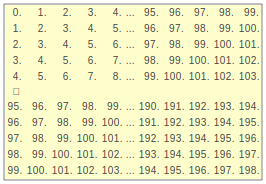

In [181]:
import graphviz

def gr_2darray_node(nodename, data, bgcolor=YELLOW):
    shape="box"
    html = gr_2darray_html(data, bgcolor=bgcolor)
    return '%s [shape="%s", space="0.0", margin="0.01", fontcolor="#444443", fontname="Helvetica", label=<%s>];\n' % (nodename,shape,html)

def myviz(data):
    s = """
    digraph G {
        nodesep=.05;
        node [penwidth="0.5", width=.1,height=.1];
    """

    s += gr_2darray_node('node%d'%id(data), data)

    s += "}\n"
    return graphviz.Source(s)
myviz(B)

In [92]:
B

array([[  0.,   1.,   2., ...,  97.,  98.,  99.],
       [  1.,   2.,   3., ...,  98.,  99., 100.],
       [  2.,   3.,   4., ...,  99., 100., 101.],
       ...,
       [ 97.,  98.,  99., ..., 194., 195., 196.],
       [ 98.,  99., 100., ..., 195., 196., 197.],
       [ 99., 100., 101., ..., 196., 197., 198.]])

In [104]:
nrows=100
ncols=100
midpoint = 10//2
list(np.arange(0,midpoint)) + list(np.arange(nrows-midpoint,nrows))

[0, 1, 2, 3, 4, 95, 96, 97, 98, 99]